# Use commit counts by day to train an LSTM model

Will build 3 separate models and test on training data just for ballpark results. The models are:

1.   Counts unscaled. 30 day chunk. 100 epochs. (lstm_model_v0.h5)
2.   Counts scaled. 30 day chunk. 100 epochs. (lstm_model_v1.h5)
3.   Counts binned into 4 bins. 30 day chunk. 100 epochs. (lstm_model_v2.h5)

Assumes have already run get_commits and wrangle_commits notebooks to produce daily commit counts.



#use if on jupyter server
import json

with open('commit_counts.txt', 'r') as f:

    commit_counts = json.loads(f.read())
    
len(commit_counts)

In [0]:
#kludge because did not want to mess with uploading it. Just copy and pasted values.

import numpy as np
commit_counts = np.array([4, 0, 0, 0, 0, 8, 12, 8, 24, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 12, 4, 0, 4, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 8, 0, 0, 0, 4, 0, 8, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 24, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 8, 8, 16, 0, 0, 8, 0, 0, 0, 0, 0, 16, 0, 20, 4, 4, 20, 4, 12, 4, 0, 0, 0, 0, 0, 0, 0, 4, 9, 0, 15, 3, 9, 12, 0, 3, 6, 6, 6, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 18, 12, 3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 78, 27, 12, 15, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 12, 6, 6, 0, 0, 0, 0, 0, 0, 0, 3, 18, 0, 0, 0, 3, 0, 9, 0, 0, 3, 3, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 3, 9, 0, 0, 0, 0, 0, 0, 6, 3, 0, 3, 0, 0, 3, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 6, 0, 6, 6, 0, 18, 6, 21, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 12, 6, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 3, 3, 30, 24, 0, 9, 3, 0, 3, 3, 3, 6, 33, 3, 0, 0, 0, 0, 9, 3, 0, 0, 6, 3, 6, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 15, 15, 9, 0, 0, 0, 6, 0, 0, 0, 18, 3, 18, 3, 3, 3, 0, 6, 0, 9, 18, 12, 0, 9, 0, 0, 0, 3, 6, 6, 0, 0, 0, 0, 0, 9, 3, 0, 15, 0, 36, 3, 0, 9, 3, 15, 3, 9, 0, 3, 6, 9, 15, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 9, 18, 0, 9, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 9, 0, 0, 0, 9, 3, 0, 24, 6, 0, 0, 15, 3, 3, 0, 0, 5, 2, 2, 10, 6, 4, 0, 8, 0, 6, 4, 2, 4, 0, 2, 0, 16, 6, 2, 6, 4, 0, 2, 4, 0, 2, 0, 0, 0, 0, 4, 0, 4, 0, 10, 4, 18, 6, 0, 4, 6, 0, 0, 26, 8, 12, 24, 0, 0, 0, 4, 4, 8, 2, 4, 0, 0, 2, 0, 2, 4, 2, 0, 0, 0, 0, 0, 4, 8, 4, 0, 2, 0, 4, 4, 4, 0, 0, 0, 0, 8, 0, 6, 4, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 6, 6, 2, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 2, 0, 2, 0, 0, 0, 4, 0, 4, 0, 8, 16, 0, 12, 0, 0, 0, 0, 2, 10, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 10, 0, 2, 8, 0, 8, 2, 0, 30, 8, 0, 8, 10, 8, 0, 6, 0, 0, 0, 4, 6, 0, 6, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 8, 0, 4, 0, 0, 0, 0, 24, 2, 4, 2, 0, 0, 2, 0, 2, 0, 0, 4, 0, 2, 2, 0, 2, 4, 0, 0, 0, 0, 2, 4, 4, 0, 0, 2, 2, 0, 0, 6, 2, 0, 4, 10, 4, 2, 0, 0, 0, 4, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 8, 2, 0, 0, 10, 4, 10, 2, 2, 2, 4, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 6, 0, 0, 0, 8, 6, 4, 30, 8, 8, 2, 2, 0, 14, 18, 6, 4, 0, 18, 16, 2, 12, 0, 0, 2, 0, 0, 8, 6, 12, 0, 0, 8, 2, 4, 2, 2, 0, 0, 18, 6, 20, 8, 2, 0, 0, 28, 8, 4, 4, 2, 2, 6, 4, 8, 8, 6, 0, 4, 0, 12, 4, 18, 8, 8, 0, 2, 10, 6, 12, 6, 14, 16, 10, 14, 24, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2])

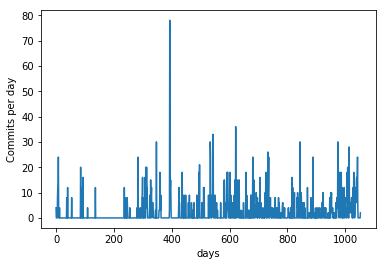

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(commit_counts)
plt.ylabel('Commits per day')
plt.xlabel('days')
plt.show()

Scale for use later.

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

commit_counts_scaled = scaler.fit_transform(commit_counts.reshape(-1, 1))  

In [4]:
commit_counts[:10]

array([ 4,  0,  0,  0,  0,  8, 12,  8, 24,  4])

In [5]:
print(commit_counts_scaled[:10])

[[0.05128205]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.1025641 ]
 [0.15384615]
 [0.1025641 ]
 [0.30769231]
 [0.05128205]]


## Working on unscaled for now

In [6]:
chunk = 30  #take 30 days in each chunk, stride = 1

features_set = []  
labels =  []  
for i in range(chunk, len(commit_counts)):  
    features_set.append(commit_counts[i-chunk:i])
    labels.append(commit_counts[i])
    
(len(features_set), len(labels))

(1023, 1023)

In [7]:
features_set[-1]  #last 30 day chunk

array([ 8,  6,  0,  4,  0, 12,  4, 18,  8,  8,  0,  2, 10,  6, 12,  6, 14,
       16, 10, 14, 24,  4,  0,  0,  0,  0,  0,  0,  0,  0])

In [8]:
labels[:20]

[0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:

features_set, labels = np.array(features_set), np.array(labels)  

In [10]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
features_set.shape

(1023, 30, 1)

In [11]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

Using TensorFlow backend.


In [12]:
model = Sequential()  


W0626 21:52:43.038202 139861523072896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [13]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


W0626 21:52:43.070674 139861523072896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 21:52:43.076282 139861523072896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
model.add(Dropout(0.2))  



W0626 21:52:43.311999 139861523072896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0626 21:52:43.328665 139861523072896 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [0]:
model.add(Dense(units = 1))  


In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


W0626 21:52:44.121560 139861523072896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
'''
Epoch 100/100
1023/1023 [==============================] - 3s 3ms/step - loss: 12.6163
'''
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


W0626 21:52:44.605077 139861523072896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0626 21:52:47.276562 139861523072896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1023/1023 [==============================] - 6s 6ms/step - loss: 32.6771
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 30.9492
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 30.8621
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 30.7022
Epoch 5/100
1023/1023 [==============================] - 3s 3ms/step - loss: 30.5254
Epoch 6/100
1023/1023 [==============================] - 3s 3ms/step - loss: 30.5282
Epoch 7/100
1023/1023 [==============================] - 3s 3ms/step - loss: 30.1852
Epoch 8/100
1023/1023 [==============================] - 3s 3ms/step - loss: 29.6312
Epoch 9/100
1023/1023 [==============================] - 3s 3ms/step - loss: 29.7794
Epoch 10/100
1023/1023 [==============================] - 3s 3ms/step - loss: 29.4069
Epoch 11/100
1023/1023 [==============================] - 3s 3ms/step - loss: 29.3236
Epoch 12/100
1023/1023 [==============================] - 3s 3m

## Write model out to gdrive

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# save model to single file
model.save('/content/gdrive/My Drive/lstm_model_v0.h5')

Make sure we can load it again.

In [13]:
from keras.models import load_model # load model from single file
model_test = load_model('/content/gdrive/My Drive/lstm_model_v0.h5') # make predictions


W0627 16:15:55.611779 139638353106816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 16:15:55.668450 139638353106816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 16:15:55.679312 139638353106816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 16:15:55.954307 139638353106816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0627 16:15:55.967601 

In [0]:
#Try on training set for giggles
check_predictions = []

for  i,chunk in enumerate(features_set):
  chunk = np.reshape(chunk, (1, features_set.shape[1], 1))
  yhat = model_test.predict(chunk, verbose=0)
  check_predictions.append((yhat, labels[i], abs(yhat-labels[i])))  #(prediction, actual, abs diff)


In [15]:
check_predictions[:10]

[(array([[0.56348395]], dtype=float32),
  0,
  array([[0.56348395]], dtype=float32)),
 (array([[-0.04569387]], dtype=float32),
  0,
  array([[0.04569387]], dtype=float32)),
 (array([[-0.03544772]], dtype=float32),
  0,
  array([[0.03544772]], dtype=float32)),
 (array([[-0.01812792]], dtype=float32),
  0,
  array([[0.01812792]], dtype=float32)),
 (array([[0.03256644]], dtype=float32),
  0,
  array([[0.03256644]], dtype=float32)),
 (array([[0.18714575]], dtype=float32),
  0,
  array([[0.18714575]], dtype=float32)),
 (array([[1.825681]], dtype=float32), 0, array([[1.825681]], dtype=float32)),
 (array([[5.986456]], dtype=float32), 8, array([[2.013544]], dtype=float32)),
 (array([[0.9313088]], dtype=float32), 0, array([[0.9313088]], dtype=float32)),
 (array([[-0.39054322]], dtype=float32),
  0,
  array([[0.39054322]], dtype=float32))]

Average (absolute) difference.

In [16]:
sum([d for x,y,d in check_predictions])/len(check_predictions)  #array([[1.7262235]], dtype=float32)

array([[1.7123202]], dtype=float32)

MSE

In [17]:
sum([d**2 for x,y,d in check_predictions])/len(check_predictions)  #array([[10.767744]], dtype=float32)

array([[10.757049]], dtype=float32)

## Kind of interesting

How many predictions are off by a given difference:
<pre>
(0, 0.34701857282502446)        #35% dead on
(1, 0.3069403714565005)         #65% within 1
(2, 0.14565004887585534)        #79% within 2
(3, 0.07429130009775171)
(4, 0.0469208211143695)
(5, 0.024437927663734114)
(6, 0.019550342130987292)
(7, 0.009775171065493646)
(8, 0.006842619745845552)
(9, 0.005865102639296188)
</pre>

In [18]:
#round prediction and compare that with actual

for i in range(10):
  print((i, len([1 for y,x,d in check_predictions if abs(x-np.round(y))==float(i)])/len(check_predictions)))

(0, 0.34701857282502446)
(1, 0.3069403714565005)
(2, 0.14565004887585534)
(3, 0.07429130009775171)
(4, 0.0469208211143695)
(5, 0.024437927663734114)
(6, 0.019550342130987292)
(7, 0.009775171065493646)
(8, 0.006842619745845552)
(9, 0.005865102639296188)


# Try with scaled features



In [27]:
commit_counts[:10]

array([ 4,  0,  0,  0,  0,  8, 12,  8, 24,  4])

In [28]:
commit_counts_scaled[:10]

array([[0.05128205],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.1025641 ],
       [0.15384615],
       [0.1025641 ],
       [0.30769231],
       [0.05128205]])

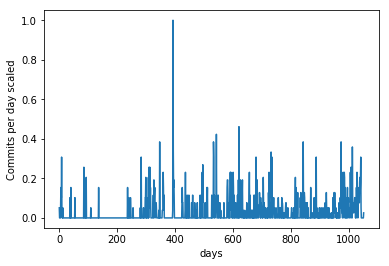

In [29]:
plt.plot(commit_counts_scaled)
plt.ylabel('Commits per day scaled')
plt.xlabel('days')
plt.show()

In [0]:
#Remember these because will reset them shortly

unscaled_labels = labels
unscaled_features_set = features_set
unscaled_check_predictions = check_predictions

## Working on scaled

In [31]:
chunk = 30  #take 30 days in each chunk

features_set = []  
labels =  []  
for i in range(chunk, len(commit_counts_scaled)):  
    features_set.append(commit_counts_scaled[i-chunk:i])
    labels.append(commit_counts_scaled[i])
    
(len(features_set), len(labels))

(1023, 1023)

In [32]:
features_set[-1]  #last 30 day chunk

array([[0.1025641 ],
       [0.07692308],
       [0.        ],
       [0.05128205],
       [0.        ],
       [0.15384615],
       [0.05128205],
       [0.23076923],
       [0.1025641 ],
       [0.1025641 ],
       [0.        ],
       [0.02564103],
       [0.12820513],
       [0.07692308],
       [0.15384615],
       [0.07692308],
       [0.17948718],
       [0.20512821],
       [0.12820513],
       [0.17948718],
       [0.30769231],
       [0.05128205],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [33]:
labels[:20]

[array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.1025641]),
 array([0.]),
 array([0.]),
 array([0.15384615]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.])]

In [0]:

features_set, labels = np.array(features_set), np.array(labels)  

In [35]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
features_set.shape

(1023, 30, 1)

In [0]:
model = Sequential()  


In [0]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [0]:
model.add(Dropout(0.2))  



In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [0]:
model.add(Dense(units = 1))  


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [42]:
'''
Epoch 100/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0047
'''
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


Epoch 1/100
1023/1023 [==============================] - 7s 7ms/step - loss: 0.0052
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0052
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0052
Epoch 5/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 6/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 7/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 8/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 9/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 10/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 11/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 12/100
1023/1023 [==============================] - 3s 3ms/step - lo

## Write model out to gdrive

In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# save model to single file
model.save('/content/gdrive/My Drive/lstm_model_v1.h5')

Make sure we can load it again.

In [0]:
from keras.models import load_model # load model from single file
model_test = load_model('/content/gdrive/My Drive/lstm_model_v1.h5') # make predictions


In [46]:
max(commit_counts)

78

In [0]:
#Try on training set for giggles
check_predictions = []

for  i,chunk in enumerate(features_set):
  chunk = np.reshape(chunk, (1, features_set.shape[1], 1))
  yhat = model_test.predict(chunk, verbose=0)
  check_predictions.append((yhat, labels[i], abs(yhat-labels[i])))


In [48]:
check_predictions[:10]

[(array([[0.02085563]], dtype=float32), array([0.]), array([[0.02085563]])),
 (array([[0.02085207]], dtype=float32), array([0.]), array([[0.02085207]])),
 (array([[0.02085352]], dtype=float32), array([0.]), array([[0.02085352]])),
 (array([[0.02085711]], dtype=float32), array([0.]), array([[0.02085711]])),
 (array([[0.02086096]], dtype=float32), array([0.]), array([[0.02086096]])),
 (array([[0.02086413]], dtype=float32), array([0.]), array([[0.02086413]])),
 (array([[0.02086657]], dtype=float32), array([0.]), array([[0.02086657]])),
 (array([[0.02086818]], dtype=float32),
  array([0.1025641]),
  array([[0.08169592]])),
 (array([[0.04026111]], dtype=float32), array([0.]), array([[0.04026111]])),
 (array([[0.03885184]], dtype=float32), array([0.]), array([[0.03885184]]))]

Average (absolute) difference.

In [49]:
sum([d for y,x,d in check_predictions])/len(check_predictions)  #array([[0.03890186]])

array([[0.04229493]])

MSE

In [50]:
sum([d**2 for y,x,d in check_predictions])/len(check_predictions)  #array([[0.00464382]])

array([[0.00466535]])

In [51]:
unscaled_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 8, 0, 0])

In [52]:
[y*78 for y,x,d in check_predictions][:10]

[array([[1.6267388]], dtype=float32),
 array([[1.6264615]], dtype=float32),
 array([[1.6265744]], dtype=float32),
 array([[1.6268543]], dtype=float32),
 array([[1.6271551]], dtype=float32),
 array([[1.6274023]], dtype=float32),
 array([[1.6275927]], dtype=float32),
 array([[1.627718]], dtype=float32),
 array([[3.1403666]], dtype=float32),
 array([[3.0304437]], dtype=float32)]

Check out actual unscaled value (between 0 and 78) with scaled prediction times 78

In [53]:
sum([ abs(val-(check_predictions[i][0]*78)) for i,val in enumerate(unscaled_labels)])/len(labels) #array([[3.0343463]], dtype=float32)
  

array([[3.299006]], dtype=float32)

Unscaled abs diff average was only 1.8093741.

# Now try binning

Bin into 4 bins arbitrarily using glance at plot of unscaled counts.
<p>
  <img src='https://www.dropbox.com/s/uwzxigie260ar5d/Screenshot%202019-06-26%2013.52.55.png?raw=1'>

In [0]:
bin1 = 5
bin2 = 10
bin3 = 20
#bin4 is anything over 20

## Note

Might want to consider 0 commits in its own bin. Depends if there is a qualitative difference between 0 and not 0. Maybe if know 0 commits for next day, can avoid doing something. But if non 0, then will have to do it no matter.

Or not. Just brainstorming.

In [0]:
binned_counts = []

for c in commit_counts:
  if c <= bin1:
    binned_counts.append(0)
    continue
    
  if c <= bin2:
    binned_counts.append(1)
    continue
    
  if c <= bin3:
    binned_counts.append(2)
    continue
    
  binned_counts.append(3)  # > bin3

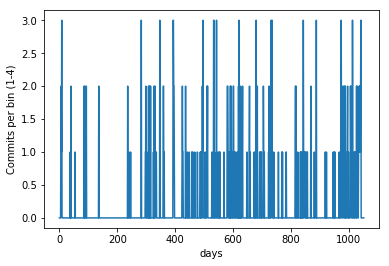

In [21]:
plt.plot(binned_counts)
plt.ylabel('Commits per bin (1-4)')
plt.xlabel('days')
plt.show()

In [22]:
chunk = 30  #take 30 days in each chunk

features_set = []  
labels =  []  
for i in range(chunk, len(binned_counts)):  
    features_set.append(binned_counts[i-chunk:i])
    labels.append(binned_counts[i])
    
(len(features_set), len(labels))

(1023, 1023)

In [23]:
print(features_set[-1])  #last 30 day chunk

[1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
labels[:20]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:

features_set, labels = np.array(features_set), np.array(labels)  

In [26]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
features_set.shape

(1023, 30, 1)

In [0]:
model = Sequential()  


In [0]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [0]:
model.add(Dropout(0.2))  



In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [0]:
model.add(Dense(units = 1))  


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [68]:
'''
Epoch 100/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3127
'''
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


Epoch 1/100
1023/1023 [==============================] - 8s 8ms/step - loss: 0.4042
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3982
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.4008
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3954
Epoch 5/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3972
Epoch 6/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3987
Epoch 7/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3943
Epoch 8/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.4003
Epoch 9/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3942
Epoch 10/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3943
Epoch 11/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.3971
Epoch 12/100
1023/1023 [==============================] - 3s 3ms/step - lo

## Write model out to gdrive

In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# save model to single file
model.save('/content/gdrive/My Drive/lstm_model_v2.h5')

Make sure we can load it again.

In [0]:
from keras.models import load_model # load model from single file
model_test = load_model('/content/gdrive/My Drive/lstm_model_v2.h5') # make predictions


In [0]:
#Try on training set for giggles
check_predictions = []

for  i,chunk in enumerate(features_set):
  chunk = np.reshape(chunk, (1, features_set.shape[1], 1))
  yhat = model_test.predict(chunk, verbose=0)
  check_predictions.append((yhat, labels[i], abs(yhat-labels[i])))


In [29]:
check_predictions[:10]

[(array([[0.06659372]], dtype=float32),
  0,
  array([[0.06659372]], dtype=float32)),
 (array([[0.04924829]], dtype=float32),
  0,
  array([[0.04924829]], dtype=float32)),
 (array([[0.06168213]], dtype=float32),
  0,
  array([[0.06168213]], dtype=float32)),
 (array([[0.09167122]], dtype=float32),
  0,
  array([[0.09167122]], dtype=float32)),
 (array([[0.12940569]], dtype=float32),
  0,
  array([[0.12940569]], dtype=float32)),
 (array([[0.1695927]], dtype=float32), 0, array([[0.1695927]], dtype=float32)),
 (array([[0.09838108]], dtype=float32),
  0,
  array([[0.09838108]], dtype=float32)),
 (array([[0.1009777]], dtype=float32), 1, array([[0.8990223]], dtype=float32)),
 (array([[0.08889107]], dtype=float32),
  0,
  array([[0.08889107]], dtype=float32)),
 (array([[0.24828091]], dtype=float32),
  0,
  array([[0.24828091]], dtype=float32))]

Average (absolute) difference.

In [74]:
sum([d for y,x,d in check_predictions])/len(check_predictions)  #array([[0.35177565]], dtype=float32)

array([[0.3064969]], dtype=float32)

MSE

In [75]:
sum([d**2 for y,x,d in check_predictions])/len(check_predictions)  #array([[0.2961716]], dtype=float32)

array([[0.2569892]], dtype=float32)

Percentages of bin diff.
<pre>
(0, 0.8132942326490714)  #81% dead on
(1, 0.1573802541544477)  #97% within 1
(2, 0.02346041055718475)
(3, 0.005865102639296188)
</pre>

In [30]:
for i in range(4):
  print((i, len([1 for y,x,d in check_predictions if abs(x-np.round(y))==float(i)])/len(check_predictions)))

(0, 0.8132942326490714)
(1, 0.1573802541544477)
(2, 0.02346041055718475)
(3, 0.005865102639296188)
